In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-uci/heart.csv


In [2]:
df = pd.read_csv("/kaggle/input/heart-disease-uci/heart.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


COLUMNS VALUE REPRESENTING:
* 1: age
* 2: sex(1 = male, 0 = female)
* 3: chest pain type (4 values)
* 4: resting blood pressure
* 5: serum cholestoral in mg/dl
* 6: fasting blood sugar > 120 mg/dl
* 7: resting electrocardiographic results (values 0,1,2)
* 8: maximum heart rate achieved
* 9: exercise induced angina
* 10: oldpeak = ST depression induced by exercise relative to rest
* 11: the slope of the peak exercise ST segment
* 12: number of major vessels (0-3) colored by flourosopy
* 13: thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

In [4]:
#CHCEKING VALUT TYPE AND NOT-NULL VALUES
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
# CHECKING MEAN STANDARD DEVIATION AND OTHER INFORMATIONS FOR COLUMNS
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


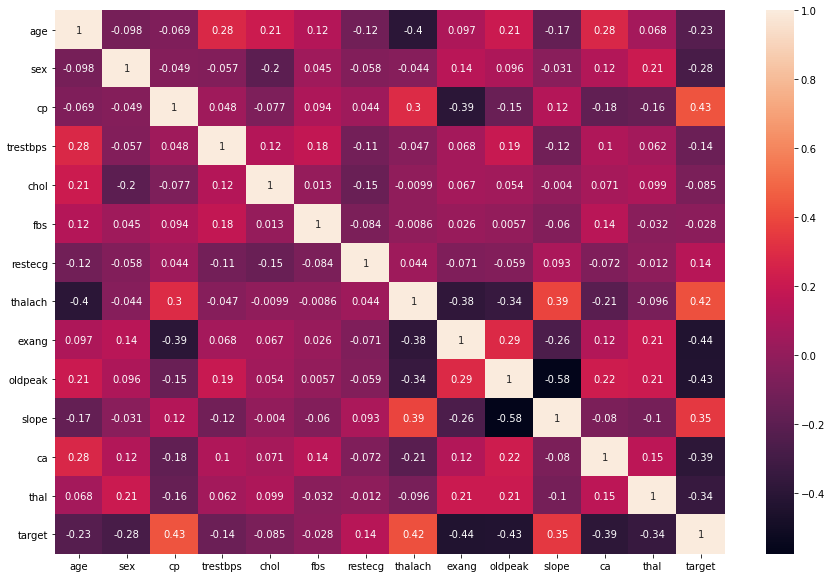

In [6]:
#CHECK COVARIANCE RELATION BETWEEN COLUMNS 
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (15,10))
#df.corr()
sns.heatmap(df.corr(),annot = True,linecolor = "RED")
plt.show()

FROM THIS CORRELATION GRAPH WE CAN SEE IT IS SHOWING GOOD CORRELATION BETWEEN TARGET AND CHEST PAIN AND TARGET AND THALACH

NOW LETS CHECK HOW HEART DISEASE DEPENDS ON AGE. AS FAR ON OUR GOOGLE KNOWLEDGE WE ASSUME THAT OLD AGES ARE MORE PRONE
TO GET HEART DISEASE.

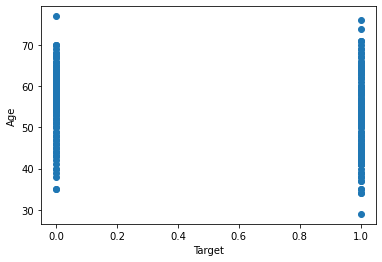

In [7]:
plt.scatter(df['target'],df['age'])
plt.xlabel("Target")
plt.ylabel("Age")
plt.show()

As 0 represent no heart disease and 1 represent heart disease. And by the upper graph it seems all the age group are having 
heart disease patients.
Lets plot distribution plot to see how many patients falls in which age groups.

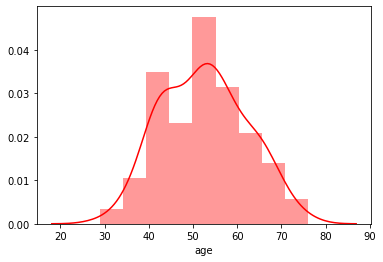

In [8]:
# Filtering patients
patients = df[df['target'] == 1]
sns.distplot(patients['age'],color = "RED")

Age group 50-60 having more patients than any other age groups.

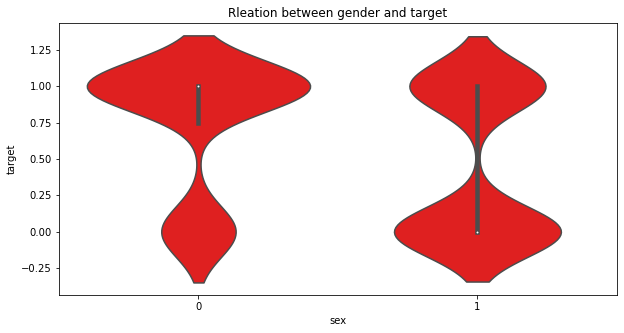

In [9]:
plt.figure(figsize = (10,5))
sns.violinplot( df["sex"] ,df["target"], color="RED")
plt.title("Rleation between gender and target")
plt.show()
#sns.distplot( df["target"] , color="red")
#sns.plt.legend()
#plt.scatter(df['sex'],df['target'])


As 0 shows female on x axis and 1 shows heart disease on y axis, and it is visible that there are high probability distribution for female means more female patient probability. Lets confirm it manually.

In [19]:
print(df['sex'].value_counts())
female = df[df['sex'] == 0]
female_patients = female[female['target'] == 1]
male = df[df['sex'] == 1]
male_patients = male[male['target'] == 1]
print("Probability for women having heart disease" + str(len(female_patients)/len(female)))
print("Probability for men having heart disease" + str(len(male_patients)/len(male)))

1    207
0     96
Name: sex, dtype: int64
Probability for women having heart disease0.75
Probability for men having heart disease0.4492753623188406


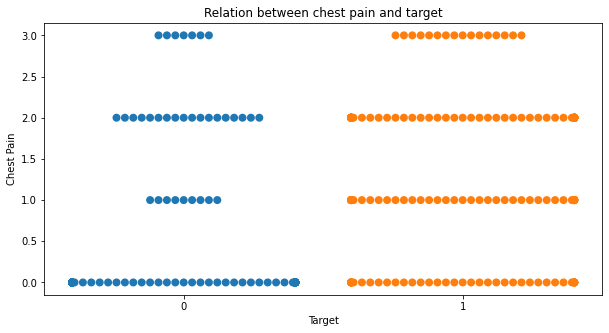

In [16]:
plt.figure(figsize = (10,5))
sns.swarmplot(df['target'],df['cp'], size = 8)
plt.xlabel("Target")
plt.ylabel("Chest Pain")
plt.title("Relation between chest pain and target")
plt.show()

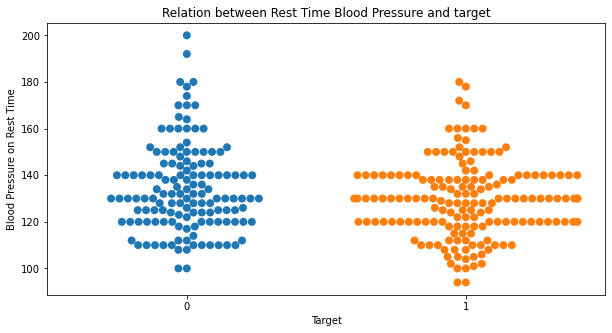

In [18]:
plt.figure(figsize = (10,5))
sns.swarmplot(df['target'],df['trestbps'], size = 8)
plt.xlabel("Target")
plt.ylabel("Blood Pressure on Rest Time")
plt.title("Relation between Rest Time Blood Pressure and target")
plt.show()

RELATION BETWEEN A PERSON'S CHOLESTROL AND HEART DISEASE.

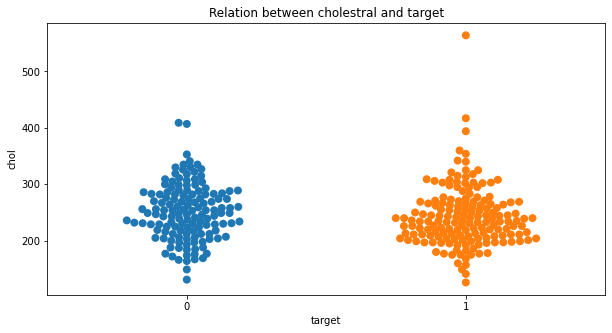

In [11]:
plt.figure(figsize = (10,5))
sns.swarmplot(df['target'],df['chol'], size = 8)
plt.title("Relation between cholestral and target")
plt.show()

This function is similar to stripplot(), but the points are adjusted (only along the categorical axis) so that they don’t overlap. This gives a better representation of the distribution of values, but it does not scale well to large numbers of observations. This style of plot is sometimes called a “beeswarm”.

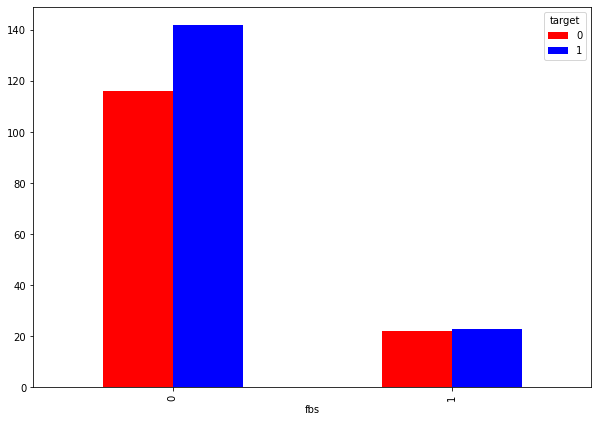

In [22]:
pd.crosstab(df['fbs'],df['target']).plot(kind="bar",figsize=(10,7),color=['RED','BLUE' ])
#plt.xlabel('Target')
#plt.ylabel('Frequency of Disease or Not')
plt.show()

In [23]:
pd.crosstab(df['fbs'],df['target'])

target,0,1
fbs,,
0,116,142
1,22,23


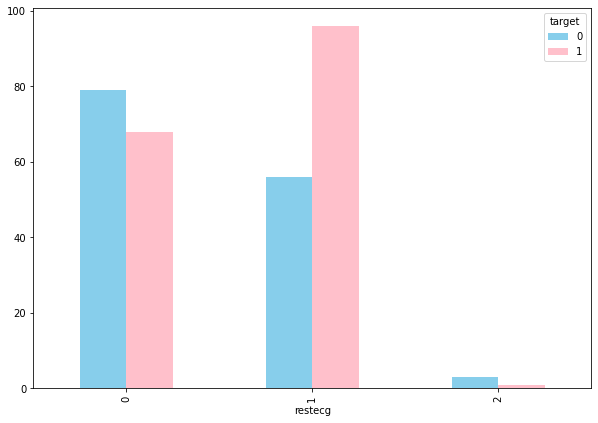

In [24]:
pd.crosstab(df['restecg'],df['target']).plot(kind="bar",figsize=(10,7),color=['yellow','purple' ])
#plt.xlabel("")
